# 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from problems import IntegerKnapsack

from circuit_lengths import add_lengths_to_df
from regressor import fit_multi

import quantum_plots as qp
_ = qp.global_setup()

In [3]:
df = pd.read_feather("../../results/int_main.feather")

df = df.drop(map(str, range(15)), axis=1)

df["method"] = df.qaoa + "_" + df.cost

df = df[np.logical_not(np.isnan(df.n_qubits))]
df = df[df.qaoa != "kickback_cost"]
df = df[np.logical_or(df.cost == "masked_cost", df.qaoa == "masked_cost")]

df["depth"] = df.depth.astype(int)
df["problem_id"] = df.problem_id.astype(int)

In [4]:
df

,depth,energy,approx_ratio,feas_ratio,feas_approx_ratio,p_opt,p_999,p_99,p_9,rnd_approx_ratio,...,problem_id,cost,qaoa,interpolate,initial,beta_scale,gamma_scale,penalty,set_penalty,method
0,1,-54.709387,0.582015,0.830309,0.700961,0.043213,0.043213,0.043213,0.218033,0.389808,...,2,default,masked_cost,True,constant,0.1,0.1,None,NaN,masked_cost_default
1,2,-64.085085,0.681756,0.942987,0.722975,0.063345,0.063345,0.063345,0.306755,0.535415,...,2,default,masked_cost,True,constant,0.1,0.1,None,NaN,masked_cost_default
2,4,-77.076567,0.819963,0.935646,0.876361,0.136731,0.136731,0.136731,0.663705,0.737176,...,2,default,masked_cost,True,constant,0.1,0.1,None,NaN,masked_cost_default
3,8,-89.672351,0.953961,0.995531,0.958244,0.157059,0.157059,0.157059,0.973285,0.932791,...,2,default,masked_cost,True,constant,0.1,0.1,None,NaN,masked_cost_default
4,16,-91.242491,0.970665,0.999563,0.971089,0.159854,0.159854,0.159854,0.994908,0.957175,...,2,default,masked_cost,True,constant,0.1,0.1,None,NaN,masked_cost_default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12563,1,-106.148929,0.471773,0.936001,0.504031,0.000009,0.000009,0.000034,0.001415,0.106719,...,63,masked_cost,quad_penalty_full_problem,True,constant,0.1,0.1,None,5.0,quad_penalty_full_problem_masked_cost
12564,2,-106.383450,0.472815,0.940709,0.502616,0.000009,0.000009,0.000032,0.001383,0.108482,...,63,masked_cost,quad_penalty_full_problem,True,constant,0.1,0.1,None,5.0,quad_penalty_full_problem_masked_cost
12565,4,-106.448098,0.473103,0.941994,0.502235,0.000009,0.000009,0.000032,0.001375,0.108968,...,63,masked_cost,quad_penalty_full_problem,True,constant,0.1,0.1,None,5.0,quad_penalty_full_problem_masked_cost
12566,8,-106.468009,0.473191,0.942604,0.502004,0.000009,0.000009,0.000032,0.001370,0.109117,...,63,masked_cost,quad_penalty_full_problem,True,constant,0.1,0.1,None,5.0,quad_penalty_full_problem_masked_cost


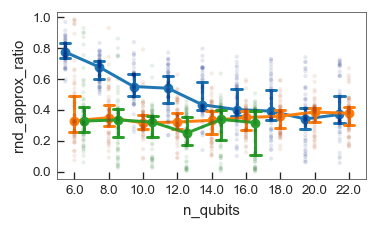

In [5]:
fig, _ = qp.plot_setup()
sns.pointplot(df.query("depth == 4"), x="n_qubits", y="rnd_approx_ratio", hue="method", dodge=.55, legend=False, estimator=np.median, capsize=0.3, errorbar=("pi", 50))
sns.stripplot(df.query("depth == 4"), x="n_qubits", y="rnd_approx_ratio", hue="method", dodge=True, alpha=0.1, legend=False, marker='.', palette="dark", jitter=False)

# plt.yscale("log")
fig.tight_layout()

In [225]:
add_lengths_to_df(df, IntegerKnapsack)

In [226]:
df["adj_clops"] = df.clops * np.ceil(np.log(0.01) / np.log(1 - df.p_opt))
df["log_adj_clops"] = np.log10(df.adj_clops)

df_fit = fit_multi(df, x="n_qubits", y="log_adj_clops", groupby=["method", "depth"])

df_fit

slope  intercept    rvalue  \
method                                depth                                  
masked_cost_default                   1      0.316165   1.888601  0.951833   
                                      2      0.340649   1.561337  0.865988   
                                      4      0.293566   1.596889  0.797165   
                                      8      0.233228   1.857313  0.823339   
                                      16     0.159244   2.418007  0.846622   
quad_penalty_cost_masked_cost         1      0.317739   1.470763  0.903724   
                                      2      0.313571   1.645781  0.848094   
                                      4      0.307467   1.737741  0.755126   
                                      8      0.264570   2.091391  0.603845   
                                      16     0.246981   2.309776  0.518562   
quad_penalty_full_problem_masked_cost 1      0.356860   1.302859  0.931677   
                                      2      0.370547   1.376266  0.881812   
                                      4      0.369751   1.395932  0.805733   
                                      8      0.351055   1.519011  0.697903   
                                      16     0.339900   1.626884  0.596104   

                                                lower     upper  
method                                depth                      
masked_cost_default                   1      0.310334  0.321995  
                                      2      0.329663  0.351635  
                                      4      0.281427  0.305706  
                                      8      0.224372  0.242085  
                                      16     0.153687  0.164800  
quad_penalty_cost_masked_cost         1      0.309237  0.326241  
                                      2      0.302691  0.324450  
                                      4      0.293113  0.321821  
                                      8      0.247002  0.282138  
                                      16     0.227471  0.266490  
quad_penalty_full_problem_masked_cost 1      0.347139  0.366582  
                                      2      0.356900  0.384194  
                                      4      0.351486  0.388015  
                                      8      0.327820  0.374290  
                                      16     0.311754  0.368046

method                                 depth
masked_cost_default                    16       None
quad_penalty_cost_masked_cost          16       None
quad_penalty_full_problem_masked_cost  16       None
dtype: object

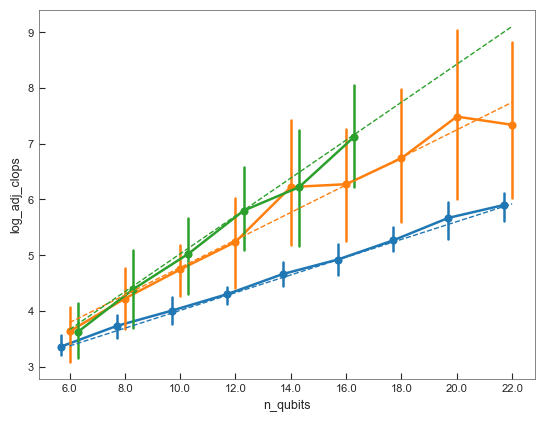

In [227]:
# qp.plot_setup()

sns.pointplot(df.query("depth==16"), x="n_qubits", y="log_adj_clops", hue="method", dodge=0.3, legend=False, errorbar=("pi",50))
# x = np.arange(6, 24, 2)
# plt.plot(x, (0.2829 + 0.005) * x + 1.04)

# plt.yscale("log")



x = np.linspace(6, 22, 100)
xi = np.linspace(0, (22 - 6) / 2, 100)
def plot_fit(d):
    plt.plot(xi,  d.intercept + d.slope * x, linestyle="--")

df_fit.query("depth == 16").apply(plot_fit, axis=1)

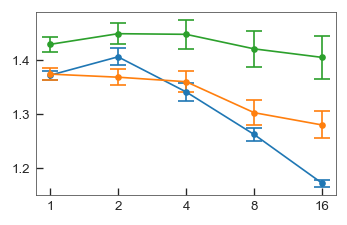

In [228]:
qp.plot_setup()
df_fit["exp_slope"] = np.exp(df_fit.slope)

dfx = df_fit.reset_index()
def plot_method(x):
    bounds = np.abs(np.exp(x[["lower", "upper"]].to_numpy().T) - np.exp(x.slope.to_numpy()[None, :]))
    plt.errorbar(np.arange(len(x.depth)), np.exp(x.slope), yerr=bounds, capsize=5, marker="o")

dfx.groupby("method").apply(plot_method)
_ = plt.xticks(np.arange(len(dfx.depth.drop_duplicates())), dfx.depth.drop_duplicates().astype(int))
# sns.pointplot(df_fit, x="depth", y="slope", hue="method")

,weight_ratio,p_opt,approx_ratio,n_qubits,log_penalty
weight_ratio,1.000000,0.090841,0.588719,-0.019242,-0.178644
p_opt,0.090841,1.000000,0.522118,-0.482439,-0.401240
approx_ratio,0.588719,0.522118,1.000000,-0.161703,-0.594368
n_qubits,-0.019242,-0.482439,-0.161703,1.000000,0.124167
log_penalty,-0.178644,-0.401240,-0.594368,0.124167,1.000000


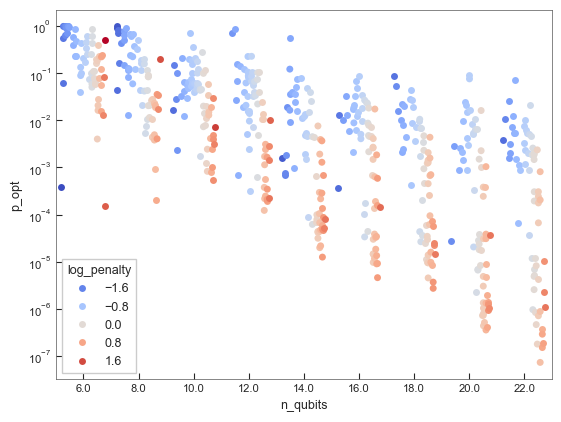

In [229]:
dfx = df[df.qaoa == "quad_penalty_cost"]
dfx = dfx.query("depth == 16")
dfx["log_penalty"] = np.log10(dfx.set_penalty)

sns.stripplot(dfx, x="n_qubits", y="p_opt", hue="log_penalty", palette="coolwarm", dodge=True, jitter=False)
plt.yscale("log")

dfx[["weight_ratio", "p_opt", "approx_ratio", "n_qubits", "log_penalty"]].corr()

In [202]:
instances = IntegerKnapsack.get_instances()[10][:64]

dat = []
for prb in instances:
    r = prb.max_capacity / sum(prb.weights)
    dg = prb.kickback_cost().scale_between_sym()
    dat += [{"id": prb.id, "weight_ratio": r, "value": v} for v in dg.to_numpy()]

In [203]:
df_prb = pd.DataFrame(dat)
df_prb["wrr"] = df.weight_ratio.transform(lambda x: np.round(x, 1))

In [204]:
# sns.histplot(df_prb, x="value", hue="id", alpha=0.1, palette="muted")

In [205]:
dfx.query("set_penalty < 0.02").set_penalty

174     0.007396
399     0.018904
744     0.017751
819     0.018904
1089    0.008264
1179    0.017778
1449    0.016790
1749    0.009452
1899    0.015556
2572    0.015625
4057    0.010417
4767    0.019722
4787    0.015306
5447    0.017600
7267    0.015625
Name: set_penalty, dtype: float64

In [206]:
# interesting instances: 40, 44, 45, 
prb = IntegerKnapsack.get_instances()[16][48]

cost, constr = prb.diagonalized()
norm = np.abs(cost.min_val)
cost = cost / norm

cost_arr = cost.to_numpy()

feas = (constr >= 0).to_numpy()

dfu = pd.DataFrame(np.stack([cost_arr, feas]).T, columns=["v", "c"])

<Axes: xlabel='v', ylabel='Count'>

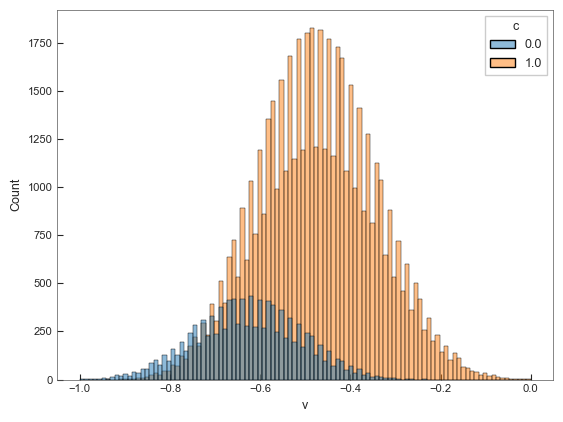

In [207]:
sns.histplot(dfu, x="v", hue="c")
# plt.xlim(-1, -0.8)
# plt.ylim(0, 200)

In [21]:
qpc = prb.quad_penalty_cost() / norm
print(prb._penalty)

dfu2 = pd.DataFrame(np.stack([qpc.to_numpy(), feas]).T, columns=["v", "c"])

0.9999999900000002


<Axes: xlabel='v', ylabel='Count'>

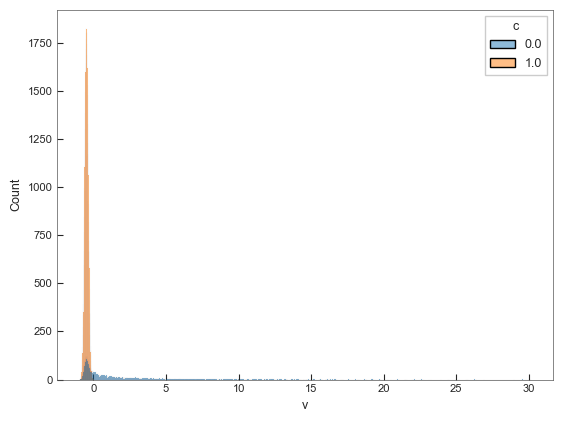

In [22]:
sns.histplot(dfu2, x="v", hue="c")
# plt.xlim(-0.8, -0.6)
# plt.ylim(0, 200)

In [23]:
prb._penalty

0.9999999900000002

In [83]:
df["log_penalty"] = df.set_penalty.transform(lambda x: x if np.isnan(x) else np.log10(x))

In [165]:
df.method

0                      masked_cost_default
1                      masked_cost_default
2                      masked_cost_default
3                      masked_cost_default
4                      masked_cost_default
                       ...                
12558    quad_penalty_full_problem_default
12559    quad_penalty_full_problem_default
12560    quad_penalty_full_problem_default
12561    quad_penalty_full_problem_default
12562    quad_penalty_full_problem_default
Name: method, Length: 7680, dtype: object

## Correlation of instance types

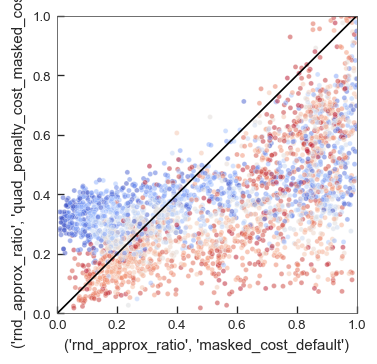

In [208]:
qp.plot_setup(aspect_ratio=1)
dfp = df.pivot(index=["problem_id", "n_qubits", "depth"], columns="method")
# dfp = dfp.query("depth == 16")
# dfp["weight_ratio"] = dfp[("weight_ratio", "masked_cost_default")]
# dfp["set_penalty"] = dfp[("set_penalty", "quad_penalty_cost_default")]
# plt.yscale("log")
# plt.xscale("log")

plt.ylim((0, 1))
plt.xlim((0, 1))

c = "rnd_approx_ratio"
default = lambda x: dfp[(x, "quad_penalty_cost_masked_cost")]
sns.scatterplot(dfp, x=(c, "masked_cost_default"), y=(c, "quad_penalty_cost_masked_cost"), hue=default("weight_ratio"), alpha=0.5, legend=False, palette="coolwarm")
plt.plot([0, 1], [0, 1], color="k")

NameError: name 'dfp' is not defined

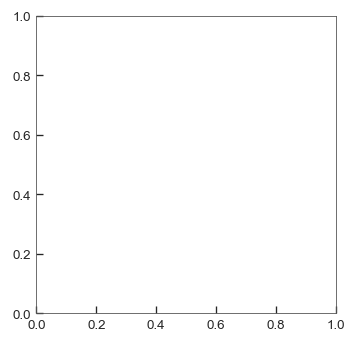

In [230]:
qp.plot_setup(aspect_ratio=1)

c = "rnd_approx_ratio"
default = lambda x: dfp[(x, "quad_penalty_cost_masked_cost")]
sns.scatterplot(dfp, x=(c, "masked_cost_default"), y=(c, "quad_penalty_cost_masked_cost"), hue="depth", style="depth", alpha=0.8, legend=False, palette="crest")
plt.plot([0, 1], [0, 1], color="k")

plt.ylim((0, 1))
plt.xlim((0, 1))

plt.xlabel("Indicator Function RAAR")
plt.ylabel("Penalty RAAR")

<Axes: xlabel='depth', ylabel='log_adj_clops'>

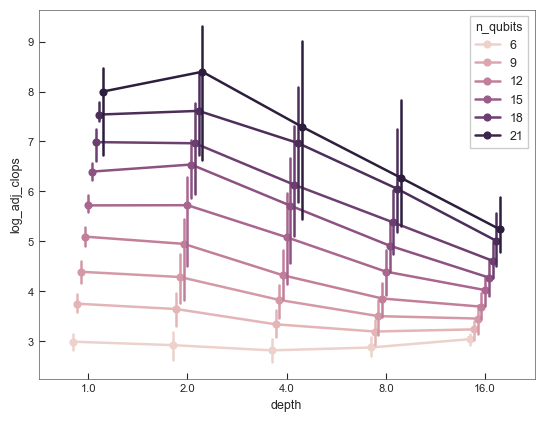

In [304]:
sns.pointplot(df.query("qaoa == 'masked_cost'"), x="depth", y="log_adj_clops", hue="n_qubits", errorbar=("pi", 75), dodge=0.3)

In [373]:
df.query("n_qubits == 22").clops.max()

1808

# Deeper optimal scaling analysis

In [255]:
df2 = pd.read_feather("../../results/int_scaling.feather")
# df2 = df2.query("qaoa == 'masked_cost'")
df2 = df2.query("n_qubits < 18")

In [256]:
add_lengths_to_df(df2, IntegerKnapsack)

In [290]:
df2["adj_clops"] = df2.clops * np.ceil(np.log(0.01) / np.log(1 - df2.p_opt))
df2["log_adj_clops"] = np.log10(df2.adj_clops)

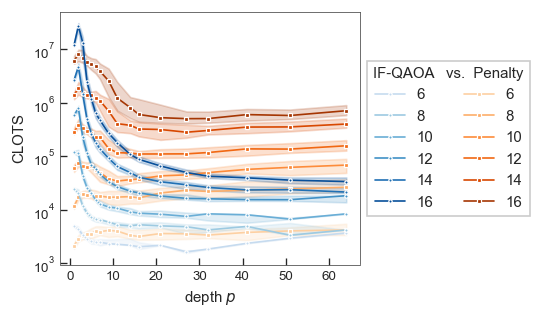

In [369]:
_, ax = qp.plot_setup(aspect_ratio=0.85)

# sns.lineplot(df2.query("qaoa == 'masked_cost'"), x="depth", y="adj_clops", hue="n_qubits", errorbar=("pi", 50), marker="o", palette="Blues")
p = sns.color_palette("Oranges", 7)[1:]
sns.lineplot(df2.query("qaoa == 'quad_penalty_cost'"), x="depth", y="adj_clops", hue="n_qubits", palette=p, legend=True, marker="s", markersize=2, estimator=np.median)

p = sns.color_palette("Blues", 7)[1:]
tgt = sns.lineplot(df2.query("qaoa == 'masked_cost'"), x="depth", y="adj_clops", hue="n_qubits", palette=p, marker="o", markersize=2, estimator=np.median)


plt.yscale("log")
plt.ylabel("CLOTS")

plt.xlabel("depth $p$")

# plt.xlim(0, 32)
x, y = ax.get_legend_handles_labels()
ax.legend_.remove()


ax.legend(x[6:] + x[:6], y, ncols=2, title="IF-QAOA   vs.  Penalty", loc="center left", bbox_to_anchor=(1, 0.5))

plt.savefig("plots/int_clops.pdf", bbox_inches="tight", transparent=True)

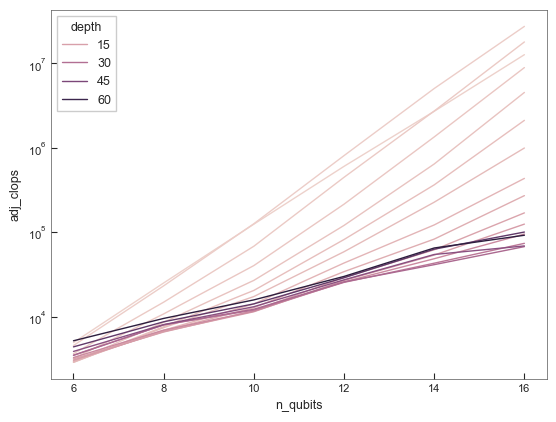

In [385]:
sns.lineplot(df2.query("qaoa == 'masked_cost'"), x="n_qubits", y="adj_clops", hue="depth", errorbar=None)
plt.yscale("log")

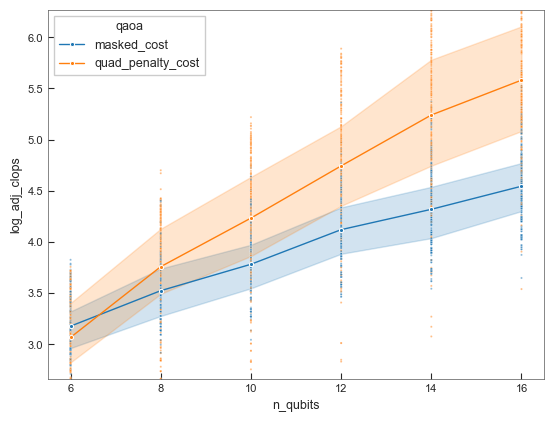

In [366]:
def func(x):
    return x.iloc[x.adj_clops.argmin()]
dfx = df2.groupby(["n_qubits", "problem_id", "qaoa"]).apply(func)

sns.lineplot(dfx, x="n_qubits", y="log_adj_clops", errorbar=("pi", 50), marker='o', hue="qaoa")
ylim = plt.gca().get_ylim()
sns.scatterplot(dfx, x="n_qubits", y="log_adj_clops", alpha=0.5, marker='.', hue="qaoa", legend=False)
plt.ylim(ylim)
# plt.xscale("log")

x = np.linspace(0, 64)

# plt.xscale("log")

# plt.plot(x, np.log10(x))


In [293]:
import statsmodels.formula.api as smf

In [294]:
reg = smf.ols("np.log(adj_clops) ~ np.log(n_qubits)", data=dfx.query("qaoa == 'masked_cost'")).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(adj_clops)   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     3197.
Date:                Thu, 25 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:21:06   Log-Likelihood:                -1727.1
No. Observations:                1536   AIC:                             3458.
Df Residuals:                    1534   BIC:                             3469.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.4423      0.135     10.677      0.000       1.177       1.707
np.log(n_qubits)     3.2246      0.057     56.544      0.000       3.113       3.336
==============================================================================
Omnibus:                       49.435   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.465
Skew:                           0.453   Prob(JB):                     2.46e-12
Kurtosis:                       3.126   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [295]:
reg = smf.ols("depth ~ n_qubits", data=dfx).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  depth   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     327.9
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           1.04e-69
Time:                        17:21:08   Log-Likelihood:                -13502.
No. Observations:                3072   AIC:                         2.701e+04
Df Residuals:                    3070   BIC:                         2.702e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5025      1.194      3.771      0.000       2.162       6.843
n_qubits       1.8768      0.104     18.107      0.000       1.674       2.080
==============================================================================
Omnibus:                      451.150   Durbin-Watson:                   2.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.193
Skew:                           0.417   Prob(JB):                     2.25e-41
Kurtosis:                       2.125   Cond. No.                         39.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [420]:
adj_clops2 = df2.groupby(["n_qubits", "depth"])["adj_clops"].mean()

In [424]:
adj_clops2.reset_index().groupby("n_qubits")

,n_qubits,depth,adj_clops
0,6,1,1037.899236
1,6,2,957.523340
2,6,3,805.182154
3,6,4,740.215901
4,6,5,707.302218
...,...,...,...
97,16,27,17642.026780
98,16,32,16289.184765
99,16,41,16524.308144
100,16,51,17144.770150


In [318]:
df_fit = fit_multi(pd.concat([df.query("qaoa == 'quad_penalty_full_problem'"), df2]), x="n_qubits", y="log_adj_clops", groupby=["qaoa", "depth"])

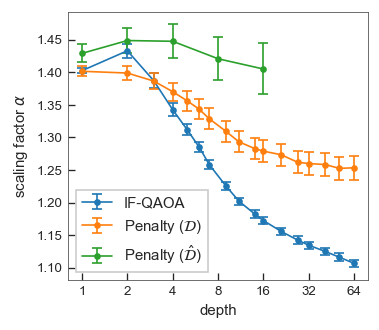

In [364]:
qp.plot_setup(aspect_ratio=0.9)
df_fit["exp_slope"] = np.exp(df_fit.slope)

dfx = df_fit.reset_index()
def plot_method(x):
    bounds = np.abs(np.exp(x[["lower", "upper"]].to_numpy().T) - np.exp(x.slope.to_numpy()[None, :]))
    plt.errorbar(x.depth, np.exp(x.slope), yerr=bounds, capsize=3, marker="o")

dfx.groupby("qaoa").apply(plot_method)

plt.xscale("log")

plt.legend(["IF-QAOA", "Penalty ($\mathcal{D}$)", "Penalty ($\hat{\mathcal{D}}$)"])

plt.ylabel(r"scaling factor $\alpha$")
plt.xlabel("depth")
plt.xticks([1 << i for i in range(7)], [1 << i for i in range(7)]);
# sns.pointplot(df_fit, x="depth", y="slope", hue="method")

plt.savefig("plots/int_scaling.pdf", bbox_inches="tight", transparent=True)

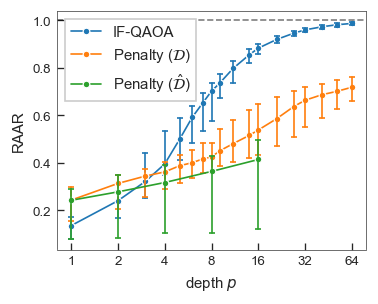

In [299]:
dfx = pd.concat([df2, df])

fig, _ = qp.plot_setup(aspect_ratio=0.8)
pl = sns.lineplot(dfx.query("n_qubits == 16"), x="depth", y="rnd_approx_ratio", hue="qaoa", errorbar=("pi", 50), marker="o", estimator=np.median, err_style="bars", err_kws={"capsize": 2}, legend=False, markersize=4)
# sns.stripplot(dfx.query("n_qubits == 16"), x="depth", y="rnd_approx_ratio", hue="qaoa", dodge=True, alpha=0.1, legend=False, marker='.', palette="dark", jitter=False)

plt.axhline(1, color="k", linestyle="--", alpha=0.5)

plt.xscale("log")

plt.ylabel("RAAR")

plt.legend(["IF-QAOA", "Penalty ($\mathcal{D}$)", "Penalty ($\hat{\mathcal{D}}$)"])


plt.xticks([1, 2, 4, 8, 16, 32, 64], [1, 2, 4, 8, 16, 32, 64])

# plt.yscale("log")
fig.tight_layout()

plt.xlabel("depth $p$")

plt.savefig("plots/cmp_16.pdf", bbox_inches="tight", transparent=True)

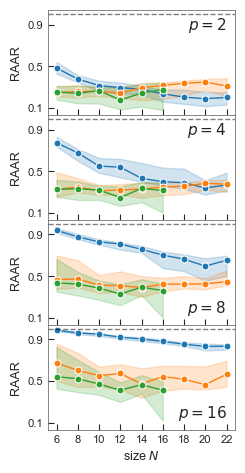

In [300]:
fg = sns.FacetGrid(df.query("depth > 1"), col="depth", aspect=2.1, height=1.2, despine=False, col_wrap=1)


fg.map_dataframe(sns.lineplot, x="n_qubits", y="rnd_approx_ratio", hue="qaoa", errorbar=("pi", 50), estimator=np.median, marker="o", markersize=5)
fg.set_ylabels("RAAR")
fg.map(plt.axhline, y=1, ls="--", c="k", alpha=0.5)
fg.set(yticks=(0.1, 0.5, 0.9))
fg.set(xticks=(6, 8, 10, 12, 14, 16, 18, 20, 22))
fg.set_titles("")

def pl_title(x, **_):
    d = x.iloc[0]
    if d < 8:
        v = 0.8
    else:
        v = 0.1
    plt.text(22, v, f"$p = {d}$", horizontalalignment="right", verticalalignment="bottom", fontsize=11)

fg.map(pl_title, "depth")
fg.set_xlabels("size $N$")
plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig("plots/cmp_multi.pdf", bbox_inches="tight", transparent=True)

In [ ]:
grid.fig.subplots_adjust(top=0.90)

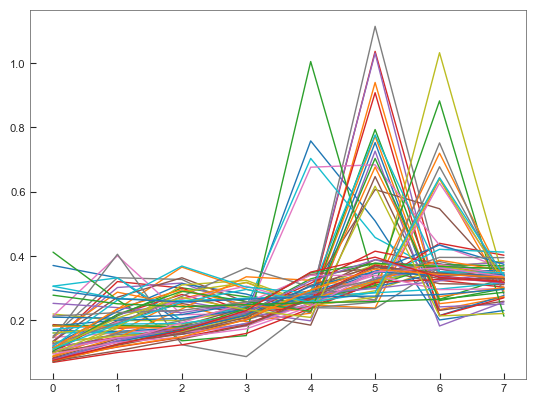

In [401]:
plt.plot(np.array(list(df.query("qaoa == 'masked_cost' and n_qubits == 10 and depth == 8").gammas)).T)

In [402]:
df2.status

0                    Success
1                    Success
2                    Success
3                    Success
4                    Success
                ...         
52899                Success
52900    ErrMaximumIteration
52901    ErrMaximumIteration
52902                Success
52903    ErrMaximumIteration
Name: status, Length: 52224, dtype: object